# ボストンの住宅価格の予測
 使えるデータ　➡　説明変数 ( RM , NOV , ... )  
 予測対象　➡　目的変数 ( MEDV )  
 RM　➡　MEDV ( 単回帰 )  

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings('ignore')

%matplotlib inline

## データの準備

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()

In [27]:
# ボストンの住宅地のデータを行列Xに格納
# 地価データをベクトルyに格納
X = boston.data[:, 5]
y = boston.target

(404,) (102,)
(404,) (102,)


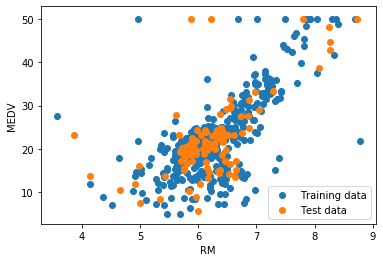

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

print(X_train.shape, X_test.shape)
print(X_train.shape, X_test.shape)

plt.scatter(X_train, y_train, label='Training data')
plt.scatter(X_test, y_test, label='Test data')

plt.xlabel('RM')
plt.ylabel('MEDV')

plt.legend()

In [5]:

df = pd.DataFrame(X, columns=boston.feature_names)
df['MEDV'] = y
df = df[['RM', 'MEDV']]
df.head()

,RM,MEDV
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


## RMとMEDVの関係性を観察する

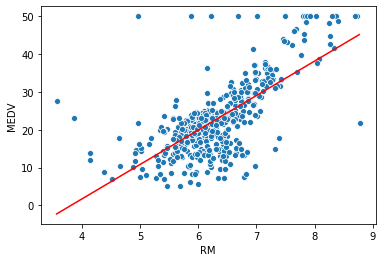

In [23]:
# 部屋数と地価の関係をプロット
sns.scatterplot(df['RM'],df['MEDV'])

# 予測の直線を描画する

# RMの最小値からRMの最大値を0.01刻みにしたデータを生成 
x_line = np.arange(df['RM'].min(), df['RM'].max(), step=0.01)

# 予測値の計算 ( .predict(X)で予測できる )
y_pred = linear_regression.predict(x_line.reshape(-1, 1))

# 直線を描画
plt.plot(x_line, y_pred, c='r')

## この分布に従う関数を予測
- y = ax + b
- y = ax^2 + bx + c  
☝を数理モデルと呼ぶ  
未知数a,b,cを決めるのが学習  

yi~ = axi + b  
(x1, y1)  
&nbsp;&nbsp;   :  
&nbsp;&nbsp;   :  
(xn, yn)

## 最小2乗法
2乗和誤差を最小にする<br>
誤差を損失という

## 予測モデルの構築

In [29]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

# 学習 ( = 未知のパラメータの最適化 )
linear_regression.fit(X_train.reshape(-1, 1), y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 結果の確認

In [19]:
a = linear_regression.coef_[0]
b = linear_regression.intercept_
a, b
print(f'MEDV = {a:.2f} RM + {b:.2f}')

MEDV = 9.10 RM + -34.67


果たして正しい予測ができているのだろうか？  
未知のデータをどれだけ正しく予測できるか？ ( 汎化性能 )
- 善し悪しの基準 ( 評価指標 Metrics )
- どうやって測るか ( 評価プロトコル )

In [24]:
linear_regression.score(df[['RM']], y)

0.4835254559913343


自分の持っているデータを分割し、モデルデータとテストデータに分ける

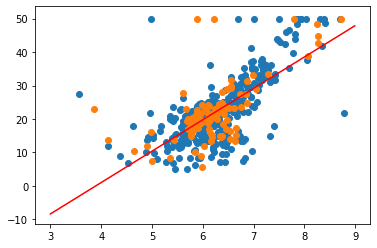

In [31]:
# 部屋数と地価の関係をプロット
plt.scatter(X_train, y_train, label='Training data')
plt.scatter(X_test, y_test, label='Test data')

# 予測の直線を描画する

# RMの最小値からRMの最大値を0.01刻みにしたデータを生成 
x_line = np.arange(3, 9, step=0.01)

# 予測値の計算 ( .predict(X)で予測できる )
y_pred = linear_regression.predict(x_line.reshape(-1, 1))

# 直線を描画
plt.plot(x_line, y_pred, c='r')

In [37]:
r2_score_train = linear_regression.score(X_train.reshape(-1, 1), y_train)
print(f'R^2 Train: {r2_score_train:.3f}')

r2_score_test = linear_regression.score(X_test.reshape(-1, 1), y_test)
print(f'R^2 Test: {r2_score_test:.3f}')

R^2 Train: 0.497
R^2 Test: 0.424


ホールドアウト ( 誤った判断 )

単回帰: y = w0 + w1x ( 変数がxの1つのみ )  
重回帰: y = w0 + w1x + w2x2 + ... + wnxn ( 変数が2つ以上 )  
多項式回帰: y = w0 + w1x1 + w2x^2 + ... wnx^n  

☝すべて線形回帰  
☟に行けば行くほど表現力 ( 複雑度 )が高い  
<br>
モデルの複雑度は高ければ高いほどいいというわけではなく、調整しないといけない  
- データ数を増やすと、表現力が高くても対応ができる  
- 複雑度を下げる ( 正則化 )